# Introduction to Image Processing

Mojdeh Rastgoo - Guillaume Lemaitre - Desire Sidibe

## **Spatial Filtering and de-noising**

The modules which are commonly used are entered in the following cell.

In [12]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import color 

# import the function to add some noise
from skimage.util import random_noise


In [13]:
Path = './images/'
lena_im = io.imread(Path.__add__('lena-grey.bmp'))
lena_im = img_as_float(lena_im)

## Smoothing

### Mean filter 
Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 1, 3, 5, 7$

Use [`skimage.filter.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

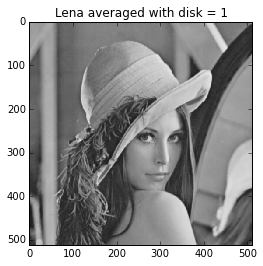

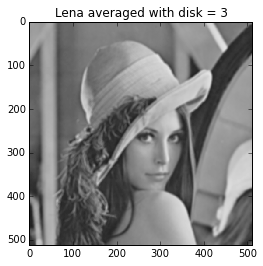

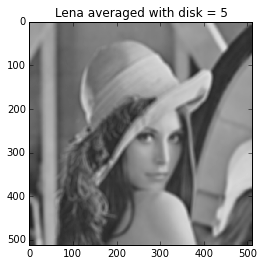

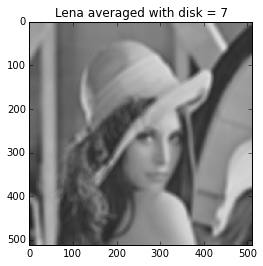

In [18]:
lena = img_as_ubyte(lena_im)

from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import mean

avg1 = mean(lena, disk(1))
plt.figure()
io.imshow(avg1)
plt.title('Lena averaged with disk = 1') 

avg3 = mean(lena, disk(3))
plt.figure()
io.imshow(avg3)
plt.title('Lena averaged with disk = 3') 

avg5 = mean(lena, disk(5))
plt.figure()
io.imshow(avg5)
plt.title('Lena averaged with disk = 5') 

avg7 = mean(lena, disk(7))
plt.figure()
io.imshow(avg7)
plt.title('Lena averaged with disk = 7') 

### Filtering using convolution 
Once again apply the mean fiter, howver instead of using `filter.rank` make your mean mask having the same size as the last filter you applied and use convolution to apply the filter. 
The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

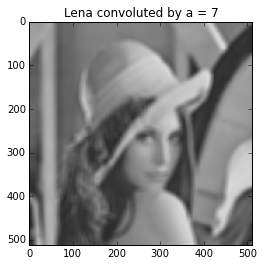

In [25]:
from scipy import ndimage
a = np.ones((14,14)) * 1./(14*14)
lenaconv = ndimage.convolve(lena, a)

plt.figure()
io.imshow(lenaconv)
plt.title('Lena convoluted by a = 7') 


Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

### Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters were already implemented in `skimage` and can be directly used without applying the previous processing.

The modules `filters` and `filters.rank` implement well known filters.

In [35]:
from skimage import filters

#####  First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator as an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

*Apply these different filters on Leaves image (`leaves.jpg`).**

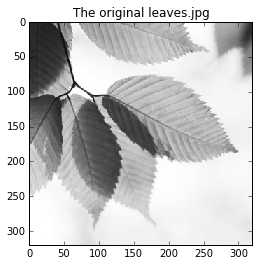

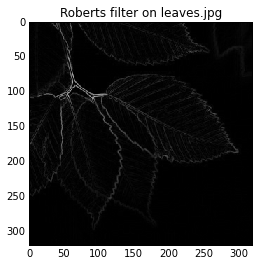

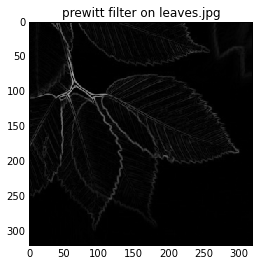

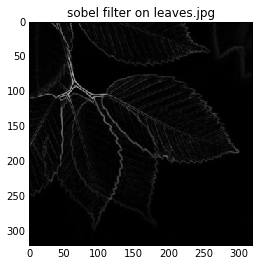

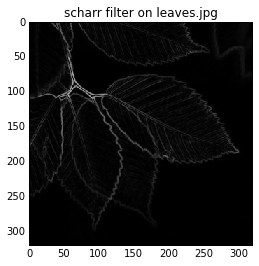

In [48]:
leaves_im = io.imread(Path.__add__('leaves.jpg'))
#leaves_im = img_as_float(leaves_im)
#leaves_im = img_as_ubyte(leaves_im)

from skimage import color
from skimage import io

leaves_gray = color.rgb2gray(leaves_im);

plt.figure()
io.imshow(leaves_gray)
plt.title('The original leaves.jpg') 

leaves_roberts = filters.roberts(leaves_gray )

plt.figure()
io.imshow(leaves_roberts)
plt.title('Roberts filter on leaves.jpg') 


leaves_prewitt = filters.prewitt(leaves_gray )

plt.figure()
io.imshow(leaves_prewitt)
plt.title('prewitt filter on leaves.jpg') 


leaves_sobel = filters.sobel(leaves_gray )

plt.figure()
io.imshow(leaves_sobel)
plt.title('sobel filter on leaves.jpg') 


leaves_scharr = filters.scharr(leaves_gray )

plt.figure()
io.imshow(leaves_scharr)
plt.title('scharr filter on leaves.jpg') 

##### Second-order edge detector

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does not provide any implementation of this filter (yet). The `scipy` toolbox, however, does through the function `ndimage.filters.laplace`.

**Apply this filter on the Leaves image.**

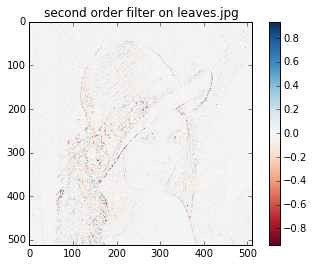

In [54]:
second_order = ndimage.filters.laplace(lena_im)

plt.figure()
io.imshow(second_order)
plt.title('second order filter on leaves.jpg') 

## Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function `util.random_noise`.

**Generate corrupted some Lena images with gaussian noise, salt & peppers noise, and speckle noise. Keep the default parameters.**

In [51]:
from skimage import util

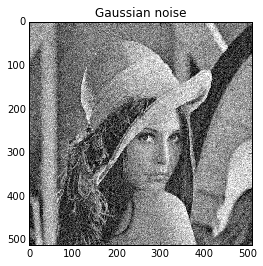

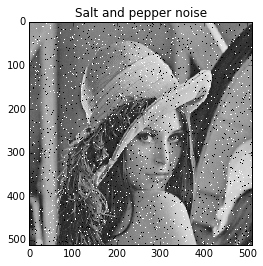

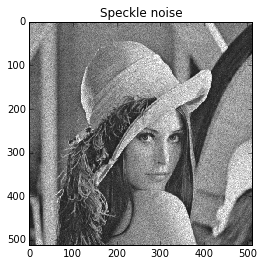

In [53]:

# Corrupt Lena
lena_gaussian = util.random_noise(lena_im, mode='gaussian')
lena_sp = util.random_noise(lena_im, mode='s&p')
lena_speckle = util.random_noise(lena_im, mode='speckle')

# Show the different corrupted Lena
plt.figure()
io.imshow(lena_gaussian)
plt.title('Gaussian noise') 

plt.figure()
io.imshow(lena_sp)
plt.title('Salt and pepper noise')

plt.figure()
io.imshow(lena_speckle)
plt.title('Speckle noise')

**Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.**

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

** mean filter: ** 

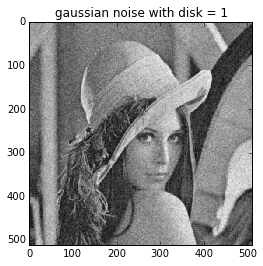

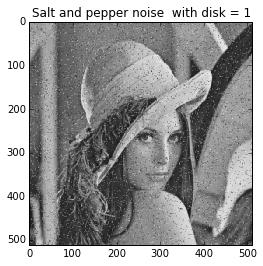

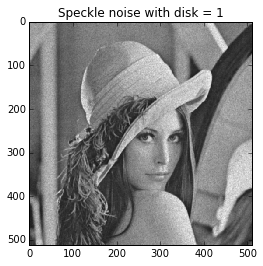

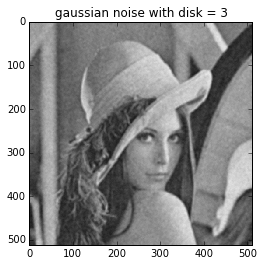

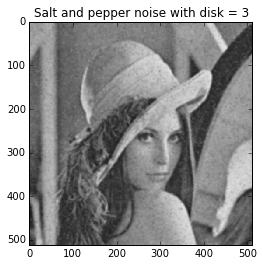

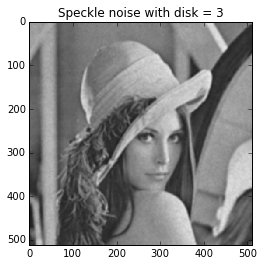

In [69]:
from skimage.filters import rank

mean_gaussian = rank.mean(lena_gaussian, disk(1))
mean_salt = rank.mean(lena_sp, disk(1))
mean_Speckle = rank.mean(lena_speckle, disk(1))

mean_gaussian3 = rank.mean(lena_gaussian, disk(3))
mean_salt3 = rank.mean(lena_sp, disk(3))
mean_Speckle3 = rank.mean(lena_speckle, disk(3))

plt.figure()
io.imshow(mean_gaussian)
plt.title('gaussian noise with disk = 1')

plt.figure()
io.imshow(mean_salt)
plt.title('Salt and pepper noise  with disk = 1')

plt.figure()
io.imshow(mean_Speckle)
plt.title('Speckle noise with disk = 1')


plt.figure()
io.imshow(mean_gaussian3)
plt.title('gaussian noise with disk = 3')

plt.figure()
io.imshow(mean_salt3)
plt.title('Salt and pepper noise with disk = 3')

plt.figure()
io.imshow(mean_Speckle3)
plt.title('Speckle noise with disk = 3')



** alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

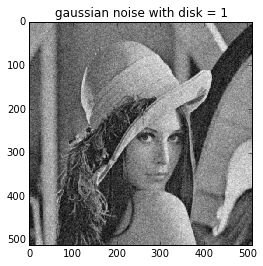

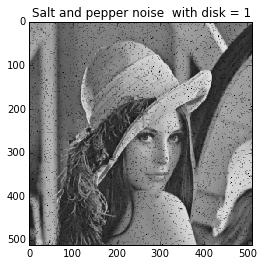

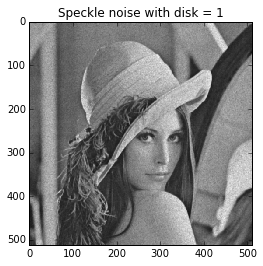

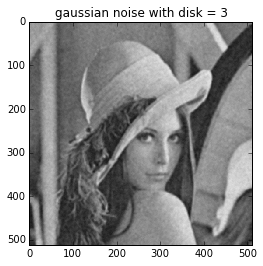

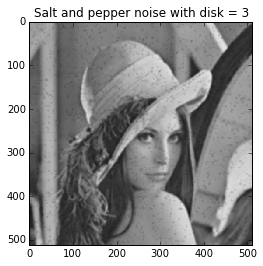

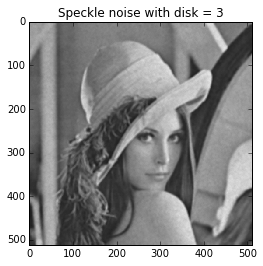

In [76]:
mean_percentile_gaussian = rank.mean_percentile(lena_gaussian, disk(1), p0=0.05, p1=0.95)
mean_percentile_salt = rank.mean_percentile(lena_sp, disk(1), p0=0.05, p1=0.95)
mean_percentile_Speckle = rank.mean_percentile(lena_speckle, disk(1), p0=0.05, p1=0.95)

mean_percentile_gaussian3 = rank.mean_percentile(lena_gaussian, disk(3), p0=0.05, p1=0.95)
mean_percentile_salt3 = rank.mean_percentile(lena_sp, disk(3), p0=0.05, p1=0.95)
mean_percentile_Speckle3 = rank.mean_percentile(lena_speckle, disk(3), p0=0.05, p1=0.95)

plt.figure()
io.imshow(mean_percentile_gaussian)
plt.title('gaussian noise with disk = 1')

plt.figure()
io.imshow(mean_percentile_salt)
plt.title('Salt and pepper noise  with disk = 1')

plt.figure()
io.imshow(mean_percentile_Speckle)
plt.title('Speckle noise with disk = 1')


plt.figure()
io.imshow(mean_percentile_gaussian3)
plt.title('gaussian noise with disk = 3')

plt.figure()
io.imshow(mean_percentile_salt3)
plt.title('Salt and pepper noise with disk = 3')

plt.figure()
io.imshow(mean_percentile_Speckle3)
plt.title('Speckle noise with disk = 3')



** median filter: **

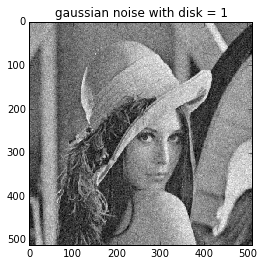

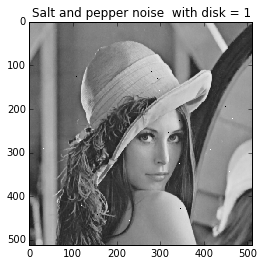

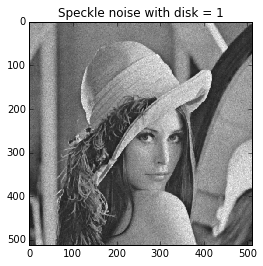

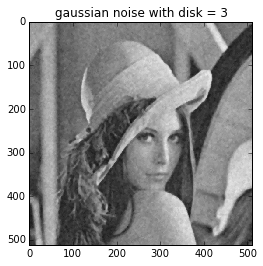

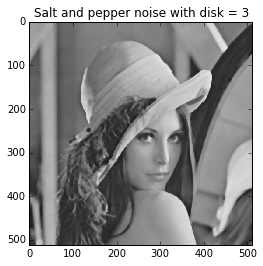

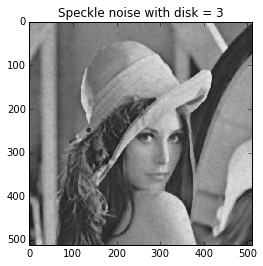

In [72]:

median_gaussian = rank.median(lena_gaussian, disk(1))
median_salt = rank.median(lena_sp, disk(1))
median_Speckle = rank.median(lena_speckle, disk(1))

median_gaussian3 = rank.median(lena_gaussian, disk(3))
median_salt3 = rank.median(lena_sp, disk(3))
median_Speckle3 = rank.median(lena_speckle, disk(3))

plt.figure()
io.imshow(median_gaussian)
plt.title('gaussian noise with disk = 1')

plt.figure()
io.imshow(median_salt)
plt.title('Salt and pepper noise  with disk = 1')

plt.figure()
io.imshow(median_Speckle)
plt.title('Speckle noise with disk = 1')


plt.figure()
io.imshow(median_gaussian3)
plt.title('gaussian noise with disk = 3')

plt.figure()
io.imshow(median_salt3)
plt.title('Salt and pepper noise with disk = 3')

plt.figure()
io.imshow(median_Speckle3)
plt.title('Speckle noise with disk = 3')



## Sharpening

Use the `railway` image and sharpen the image using laplacian fitering.

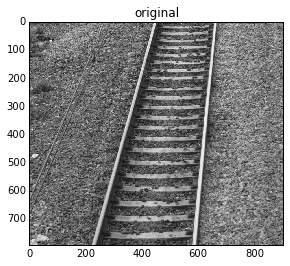

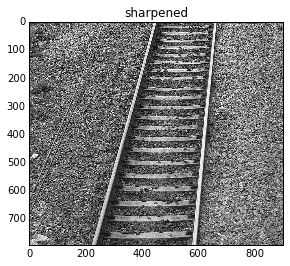

In [93]:
railway_im = io.imread(Path.__add__('railway.jpg'))
railway_gray = color.rgb2gray(railway_im);
railway_gray = img_as_float(railway_gray)

plt.figure()
io.imshow(railway_gray)
plt.title('original')

laplacian = ndimage.filters.laplace(railway_gray)
out = railway_gray - laplacian

plt.figure()
plt.imshow(out, cmap= cm.gray, vmin= 0, vmax = 1.)
plt.title('sharpened') 

## Hough transform

** Define your Hough_trans function which finds the lines within an image** 

you can use either `hough_line` and `hough_line_peaks` or `probabilistic_hough_line` from [`skimage.transform`](http://scikit-image.org/docs/dev/api/skimage.transform.html). 

search a bit to know the difference between `probablistic_hough_line` and `hough_line`

Or `HoughLines` and `HoughLinesP` from [`cv2`](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


Test your function on `railway` and `building` images. 

**Note : use `skimage.feature.canny` (`cv2.canny`) edge detector to find the primary edges**

In [102]:
from skimage import feature
from skimage import transform

import cv2

#img = cv2.imread('dave.jpg')
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(railway_gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imwrite('houghlines5.jpg',img)


#edges2 = feature.canny(railway_gray, sigma=3)
#out1 = transform.probabilistic_hough_line(edges2)

#print out1

#plt.figure()
#io.imshow(edges2)
#plt.title('canny out')

#plt.figure()
#io.imshow(out1)
#plt.title('prob. haugh out')

ImportError: No module named cv2